<div class="alert alert-info">
    <h2>Intro:</h2>
        <p>Here at Megaline I just recieved access to behavior data about subscribers who have already switched to new plans. I am going to build predictive models that can analyze customer behavior and recommend one of Megalines plans which are smart and ultra.</p>
</div>
<div class="alert alert-info">
    <h3>Goal</h3>
    <p> the goal in this research and data model that I am building is to develop a model with the highest accuracy possible and we are looking for accuracy at minimum 75%.</p>
</div>
<div class="alert alert-info">
    <h3>Open the data</h3>
</div>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

<div class="alert alert-info">
    <h3>Imported everthing. now we are examining data</h3>
</div>

In [2]:
df = pd.read_csv('/datasets/users_behavior.csv')
df

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0
...,...,...,...,...,...
3209,122.0,910.98,20.0,35124.90,1
3210,25.0,190.36,0.0,3275.61,0
3211,97.0,634.44,70.0,13974.06,0
3212,64.0,462.32,90.0,31239.78,0


In [3]:
df.isna().sum()

calls       0
minutes     0
messages    0
mb_used     0
is_ultra    0
dtype: int64

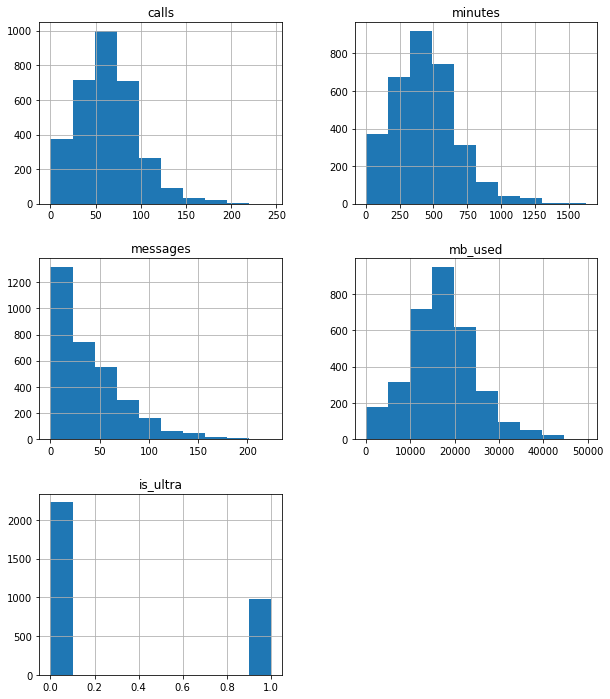

In [4]:
df.hist(figsize=(10, 12));

In [5]:
total_count = df['is_ultra'].value_counts()
total_count

0    2229
1     985
Name: is_ultra, dtype: int64

<div class="alert alert-info">
    <h3>Conclusion:</h3>
        <p>In the cells above I double checked to make sure the data was cleaned. I also made a bunch of histograms to get a better understanding of what the results were inside all the the columns in a graph form. Then I created a new variable with just the is_ultra column to see the actual amount of people who had smart plans or ultra plans. which correlates perfectly with the histogram above. so there are 2229 people with the smart plan and only 985 people with the ultimate plan.</p>

</div>

<div class="alert alert-info">
    <h2>Spliting Data:</h2>
</div>

In [6]:
# Split the DataFrame into train and test sets
train, test = train_test_split(df, test_size=0.4, random_state=42)

# Split the test set into validation and test sets
valid, test = train_test_split(test, test_size=0.5, random_state=42)

In [7]:
# Separate features and target for the train set
feat_train = train.drop('is_ultra', axis=1)
targ_train = train['is_ultra']

# Print the shapes of the datasets
print(feat_train.shape)
print(targ_train.shape)

(1928, 4)
(1928,)


In [8]:
# Separate features and target for the validation set
feat_valid = valid.drop('is_ultra', axis=1)
targ_valid = valid['is_ultra']

print(feat_valid.shape)
print(targ_valid.shape)

(643, 4)
(643,)


In [9]:
# Separate features and target for the test set
feat_test = test.drop('is_ultra', axis=1)
targ_test = test['is_ultra']

print(feat_test.shape)
print(targ_test.shape)

(643, 4)
(643,)


<div class="alert alert-info">
    <h3>Conclusion:</h3>
        <p>I used the test split function twice.  I split the original DataFrame into train and test sets with a test size of 40%.It is 40% because you are adding the 20% from the validation set and the test set together. Then, we split the test set into validation and test sets with a test size of 50%. I choose a test size of 50% because we do have a solid amount of data and set the random state on both test sets to 42 because that makes sure the random process will produce the same results each time you run the code with the same data.Then for the next 3 cells I dropped the is_ultra column and put it as axis 1 which represents the columns of the dataframe. and after is_ultra got droped it set it up to be used for the target. That was consistant for the test, valid, and the train of course after that I printed the shape. 
        </p>
</div>

<div class="alert alert-info">
    <h2>Models:</h2>
</div>

<div class="alert alert-info">
    <h3>Logistic Regression:</h3>
</div>

<div class="alert alert-info">
    <h4>Logistic Regression Conclusion:</h4>
        <p>Logistic Regressions accuracy is lower but it is very fast. lbfgs and newton-cg gave the best results for both the train and validation sets but all of the solvers that I ran fail because they were not atleast 75%. I used 5 different solvers so I could have an few different looks at the data because all solvers work differently which as we can see yields different results.</p>
</div>

<div class="alert alert-info">
    <h3>Decision Tree:</h3>
</div>

In [11]:
dt_cols = ['depth', 'acc_train', 'acc_valid']
dt_list = []

for depth in range(1, 11):
    model_dt = DecisionTreeClassifier(max_depth=depth, random_state=42)
    model_dt.fit(feat_train, targ_train)
    dt_list.append([depth,
                              model_dt.score(feat_train, targ_train),
                              model_dt.score(feat_valid, targ_valid)
                              ])
    
dt = pd.DataFrame(dt_list, columns=dt_cols)
dt

,depth,acc_train,acc_valid
0,1,0.747925,0.730949
1,2,0.781639,0.782271
2,3,0.797199,0.791602
3,4,0.808610,0.780715
4,5,0.815353,0.772939
5,6,0.822614,0.776050
6,7,0.838693,0.780715
7,8,0.852178,0.796267
8,9,0.863589,0.780715
9,10,0.878631,0.794712


<div class="alert alert-info">
    <h4>Decision Tree Conclusion:</h4>
        <p>In the decision tree model as the depth increases the accuracy on the training set also improves but that is not the same case for the validation side. Right when the max depth gets to 3 the accuracy for the validation set really starts to lose accuracy. I also find it interesting that at the depth of 3 is also the last point where both the train and validation sets are similar. This is most likely caused from overfitting.</p>
</div>

<div class="alert alert-info">
    <h3>Random Forest:</h3>
</div>

In [12]:
rf_cols = ['estimator', 'acc_train', 'acc_valid']
rf_list = []

for estimator in range(10, 101, 10):
    model_rf = RandomForestClassifier(n_estimators=estimator, random_state=42)
    model_rf.fit(feat_train, targ_train)
    rf_list.append([estimator,
                              model_rf.score(feat_train, targ_train),
                              model_rf.score(feat_valid, targ_valid)
                              ])
    
rf = pd.DataFrame(rf_list, columns=rf_cols)
rf

,estimator,acc_train,acc_valid
0,10,0.980290,0.786936
1,20,0.991701,0.791602
2,30,0.994813,0.793157
3,40,0.997925,0.796267
4,50,0.997925,0.796267
5,60,0.999481,0.796267
6,70,0.998963,0.797823
7,80,1.000000,0.800933
8,90,1.000000,0.802488
9,100,1.000000,0.802488


<div class="alert alert-info">
    <h4>Random Forest Conclusion:</h4>
        <p>In the random forest model the n_estimator increases until it hits the cap of 1 in the test set. Its important to note that the n_estimator hits accuracy of 80% in the validation set at estimator 80 and then once it hits estimator 90 it slightly increases but that is where it stops improving.</p>
</div>

<div class="alert alert-info">
    <h3>Models Conclusion:</h3>
        <p>Overall there is a ton that we learned durning this research that I conducted. we learned that the Logistic Regression did not hit the 75% mark. The Decision Tree only started getting more accurate on the train set the validation set becomes wacky after a depth of 3. The Random Forest was by far the most accurate and achieved the threshold of 75% actually over so the best method would be to use the Random Forest model and set it to the n_estimator of 90. 
        </p>
</div>

<div class="alert alert-info">
    <h2>Testing the Model:</h2>
    <p>From the models I tried in the last section titled models. I came to the conclusion that the best model would be the random forest model and I am setting the n_estimator to 90 which achieved a 80.02% in the validation set and hit the cap in the train set.</p>
</div>

In [13]:
model = RandomForestClassifier(n_estimators=90, random_state=42)
model.fit(feat_train, targ_train)

print('Best models accuracy on the train set:', model.score(feat_train, targ_train))
print('Best models accuracy on the validation set:', model.score(feat_valid, targ_valid))
print('Best models accuracy on the test set:', model.score(feat_test, targ_test))

Best models accuracy on the train set: 1.0
Best models accuracy on the validation set: 0.80248833592535
Best models accuracy on the test set: 0.8133748055987559


<div class="alert alert-info">
    <h2>Findings:</h2>
        <p>The random forest model had the accuracy of 81.34% on the test set so this project meets 
        the threshold that we were looking for. I hope the predictive models helps us in understanding the behavior of the customers we have at Megaline.</p>
</div>